In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install yfinance
import yfinance as yf
import datetime
# !pip3 install plotly
import plotly.graph_objs as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

C:\Users\nehal\AppData\Local\Temp/ipykernel_8592/1180545522.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#https://www.fool.com/investing/stock-market/market-sectors/
#sectors = [energy, materials, industrials, utilities, healthcare, financials, consumer_discretionary, consumer_staples, information_technology, communication_services, real_estate]

data = yf.download("^GSPC AMZN XOM CVX SHW DD BA UNP DUK ED AEP UNH JNJ BRK-A JPM MCD KO PG AAPL MSFT FB GOOGL GOOG AMT SPG", start="2012-01-01", end="2022-02-18")
data = data["Adj Close"]
print(data)

[*********************100%***********************]  25 of 25 completed
                  AAPL        AEP         AMT         AMZN          BA  \
Date                                                                     
2012-01-03   12.575915  27.925907   49.124508   179.029999   60.731110   
2012-01-04   12.643502  28.014942   49.834522   177.509995   60.821117   
2012-01-05   12.783867  28.049196   50.410873   177.610001   60.166489   
2012-01-06   12.917508  27.939592   50.327351   182.610001   60.534706   
2012-01-09   12.897016  28.069735   50.469376   178.559998   60.984749   
...                ...        ...         ...          ...         ...   
2022-02-14  168.880005  86.180000  234.289993  3103.340088  210.039993   
2022-02-15  172.789993  85.440002  233.389999  3130.209961  217.729996   
2022-02-16  172.550003  85.410004  232.330002  3162.010010  218.929993   
2022-02-17  168.880005  85.489998  228.669998  3093.050049  213.580002   
2022-02-18         NaN        NaN        

In [3]:
data = data.reset_index(level=None, drop=False, inplace=False)
data.head()

Date       AAPL        AEP        AMT        AMZN         BA  \
0 2012-01-03  12.575915  27.925907  49.124508  179.029999  60.731110   
1 2012-01-04  12.643502  28.014942  49.834522  177.509995  60.821117   
2 2012-01-05  12.783867  28.049196  50.410873  177.610001  60.166489   
3 2012-01-06  12.917508  27.939592  50.327351  182.610001  60.534706   
4 2012-01-09  12.897016  28.069735  50.469376  178.559998  60.984749   

      BRK-A        CVX         DD        DUK  ...         KO        MCD  \
0  116320.0  72.389839  31.980608  41.743435  ...  25.638760  74.442345   
1  115210.0  72.265221  32.152367  41.550350  ...  25.477926  74.856598   
2  115650.0  71.556862  32.356335  41.531040  ...  25.357292  75.188004   
3  114500.0  71.038734  32.549572  41.531040  ...  25.196459  75.767929   
4  114500.0  71.812683  32.538837  41.453823  ...  25.196459  75.044876   

        MSFT         PG        SHW        SPG        UNH        UNP  \
0  21.623138  49.150513  27.431313  81.046120  44.067696  43.632122   
1  22.132010  49.128445  27.711649  79.642937  44.709595  43.947235   
2  22.358171  48.922508  27.925680  80.062622  45.009117  43.628071   
3  22.705507  48.804848  27.883472  79.442474  45.171738  43.442238   
4  22.406637  49.010765  28.100515  79.379822  45.120377  44.234077   

         XOM        ^GSPC  
0  56.468872  1277.060059  
1  56.482021  1277.300049  
2  56.311291  1281.060059  
3  55.891052  1277.810059  
4  56.140549  1280.699951  

[5 rows x 26 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2551 non-null   datetime64[ns]
 1   AAPL    2550 non-null   float64       
 2   AEP     2550 non-null   float64       
 3   AMT     2550 non-null   float64       
 4   AMZN    2550 non-null   float64       
 5   BA      2550 non-null   float64       
 6   BRK-A   2550 non-null   float64       
 7   CVX     2550 non-null   float64       
 8   DD      2550 non-null   float64       
 9   DUK     2550 non-null   float64       
 10  ED      2550 non-null   float64       
 11  FB      2455 non-null   float64       
 12  GOOG    2550 non-null   float64       
 13  GOOGL   2550 non-null   float64       
 14  JNJ     2550 non-null   float64       
 15  JPM     2550 non-null   float64       
 16  KO      2550 non-null   float64       
 17  MCD     2550 non-null   float64       
 18  MSFT    

In [5]:
data.describe()

AAPL          AEP          AMT         AMZN           BA  \
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean     48.823132    57.035268   133.552112  1270.637874   182.715035   
std      41.490278    19.479836    70.302951  1067.156923    98.792831   
min      12.119164    25.798325    49.124508   175.929993    55.668320   
25%      21.349949    40.711660    77.778883   335.062508   111.078197   
50%      30.101217    55.928267   104.100887   835.475006   141.152901   
75%      53.446771    76.284964   200.923454  1854.802460   245.385830   
max     181.778397    97.346504   300.716888  3731.409912   430.299957   

               BRK-A          CVX           DD          DUK           ED  ...  \
count    2550.000000  2550.000000  2550.000000  2550.000000  2550.000000  ...   
mean   254196.510980    87.152989    62.662976    66.271158    59.706747  ...   
std     85451.198977    13.982321    17.380838    16.850017    14.455041  ...   
min    114500.000000    48.814346    27.563757    39.753605    37.830963  ...   
25%    191767.500000    77.983505    51.625217    51.987700    43.366244  ...   
50%    245825.000000    84.887138    62.772198    64.367535    63.441343  ...   
75%    310494.000000    98.419090    76.081999    78.434546    71.248093  ...   
max    485379.000000   137.367767   101.112885   105.711632    87.266930  ...   

                KO          MCD         MSFT           PG          SHW  \
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean     38.864082   133.131278    96.508484    84.031075   124.187653   
std       8.637813    57.273035    82.495635    29.025730    75.399658   
min      24.487318    64.752426    21.623138    44.310284    27.431313   
25%      31.981501    78.615740    36.358564    63.767945    64.064760   
50%      37.169979   111.411758    58.979401    73.039398    97.218086   
75%      44.767418   181.836895   133.297352   107.511166   154.732708   
max      62.119999   269.690002   342.402008   164.139999   352.160004   

               SPG          UNH          UNP          XOM        ^GSPC  
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000  
mean    122.496091   179.258496   116.450164    59.970805  2498.843849  
std      26.569604   116.075893    54.765918     8.650761   853.184017  
min      39.909321    43.092010    42.639202    27.525694  1277.060059  
25%     103.443609    73.056030    73.576324    57.781524  1918.379974  
50%     128.776985   150.115334    97.928211    61.502794  2279.810059  
75%     141.440407   250.147388   158.079662    65.335203  2907.322449  
max     173.535263   505.579987   254.779999    81.486641  4796.560059  

[8 rows x 25 columns]

In [6]:
# !pip install missingno
import missingno as msno
data.isna().sum()

Date      0
AAPL      1
AEP       1
AMT       1
AMZN      1
BA        1
BRK-A     1
CVX       1
DD        1
DUK       1
ED        1
FB       96
GOOG      1
GOOGL     1
JNJ       1
JPM       1
KO        1
MCD       1
MSFT      1
PG        1
SHW       1
SPG       1
UNH       1
UNP       1
XOM       1
^GSPC     1
dtype: int64

<AxesSubplot:>

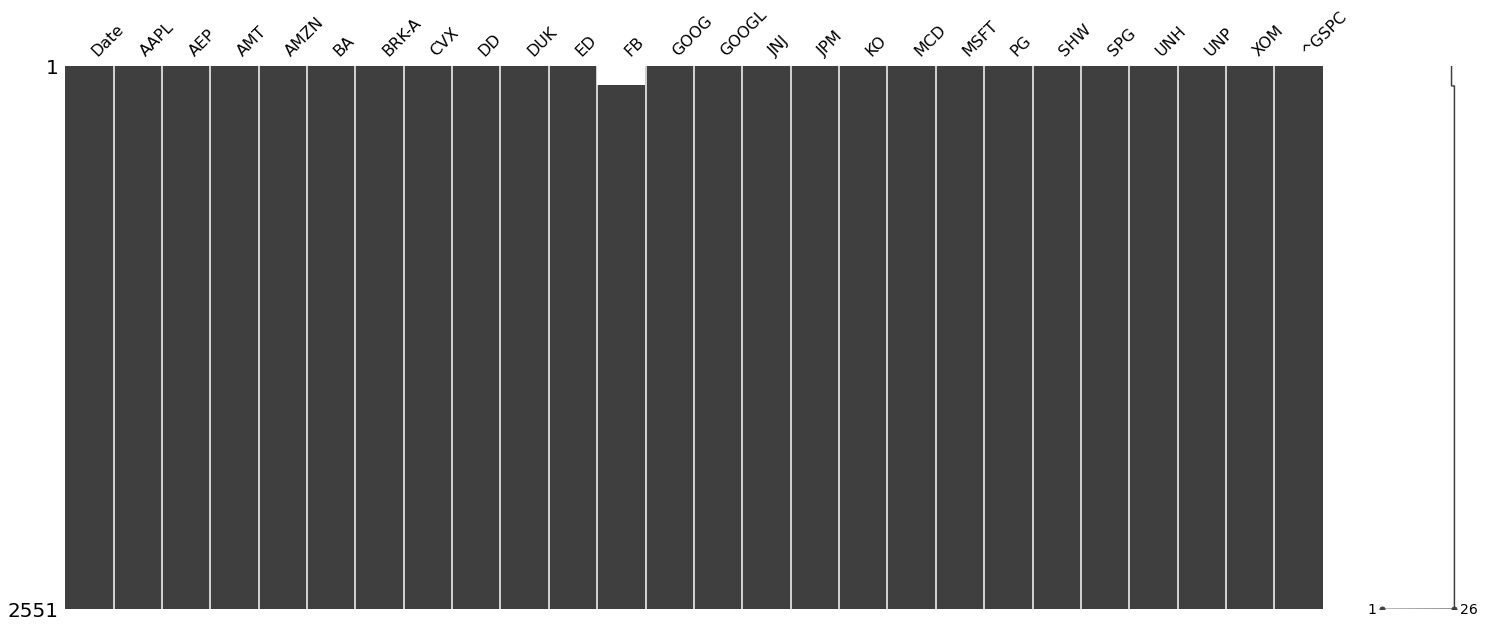

In [7]:
msno.matrix(data)

8097.823079025326


<AxesSubplot:xlabel='FB', ylabel='Count'>

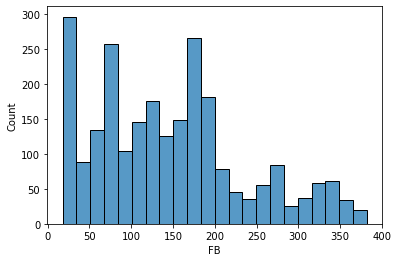

In [8]:
print(data['FB'].var())
sns.histplot(data['FB'])
#data is skewed, so I don't want to use mean value for the imputation. 
#KNN imputation will not work because of the non-gausian distribution. 
#Can not replace by mode because the highest frequency value is not near the mean value.
#So using median for imputation.

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\nehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


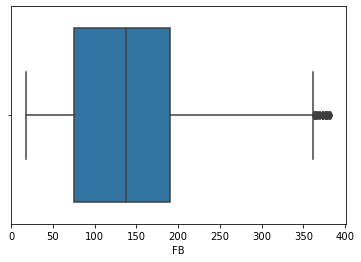

In [9]:
# Box plot
print(sns.boxplot(data['FB']))

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\nehal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


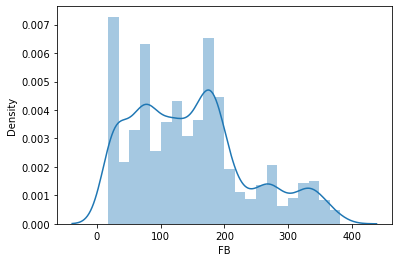

In [10]:
# Distribution plot
print(sns.distplot(data['FB']))

In [11]:
data = data.fillna(data['FB'].median())

In [12]:
data.isna().sum()

Date     0
AAPL     0
AEP      0
AMT      0
AMZN     0
BA       0
BRK-A    0
CVX      0
DD       0
DUK      0
ED       0
FB       0
GOOG     0
GOOGL    0
JNJ      0
JPM      0
KO       0
MCD      0
MSFT     0
PG       0
SHW      0
SPG      0
UNH      0
UNP      0
XOM      0
^GSPC    0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

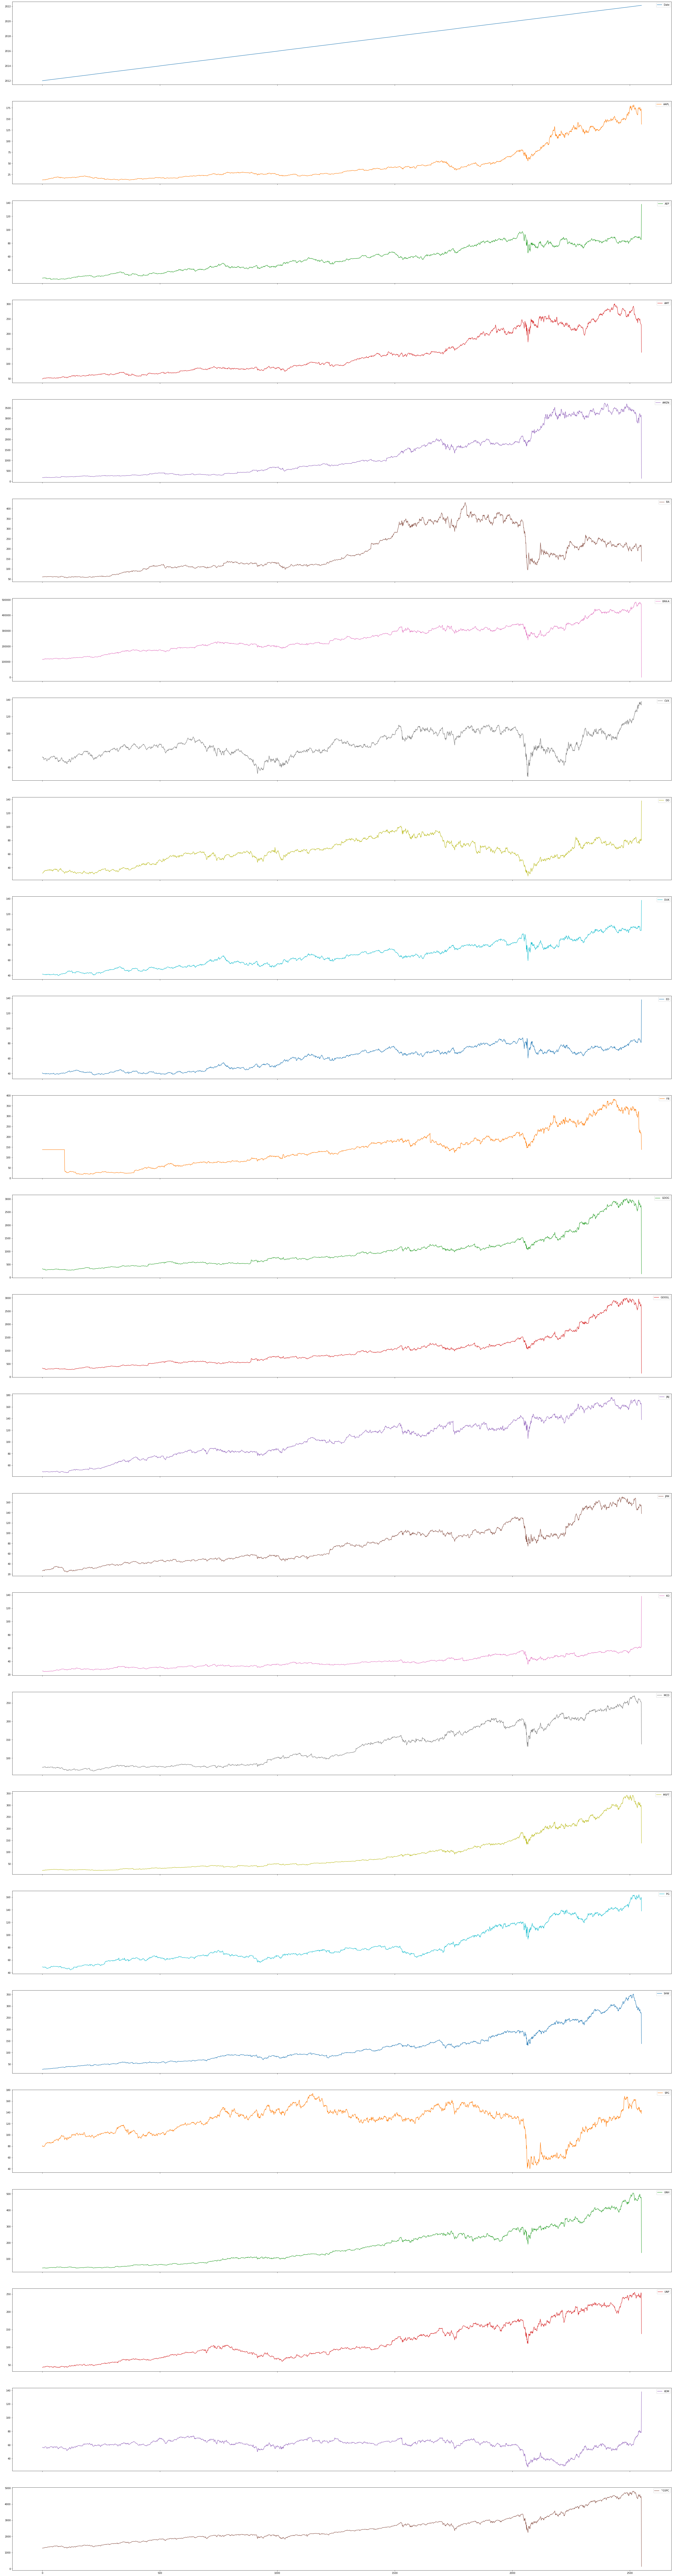

In [13]:
data.plot(kind="line", figsize=(50,200), subplots = True)

In [14]:
data.columns
data['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
2546   2022-02-14
2547   2022-02-15
2548   2022-02-16
2549   2022-02-17
2550   2022-02-18
Name: Date, Length: 2551, dtype: datetime64[ns]

In [15]:
data2 = data.drop(['Date'], axis = 1)
log_returns = np.log(data2/data2.shift())
log_returns

AAPL       AEP       AMT      AMZN        BA     BRK-A       CVX  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1     0.005360  0.003183  0.014350 -0.008526  0.001481 -0.009588 -0.001723   
2     0.011041  0.001222  0.011499  0.000563 -0.010822  0.003812 -0.009851   
3     0.010400 -0.003915 -0.001658  0.027763  0.006101 -0.009994 -0.007267   
4    -0.001588  0.004647  0.002818 -0.022428  0.007407  0.000000  0.010836   
...        ...       ...       ...       ...       ...       ...       ...   
2546  0.001422 -0.016913 -0.011078  0.012148 -0.010702 -0.014625 -0.015537   
2547  0.022889 -0.008624 -0.003849  0.008621  0.035958  0.003318 -0.007347   
2548 -0.001390 -0.000351 -0.004552  0.010108  0.005496  0.000978  0.000298   
2549 -0.021499  0.000936 -0.015879 -0.022050 -0.024741 -0.008018 -0.005151   
2550 -0.202297  0.478492 -0.505389 -3.110022 -0.437120 -8.134989  0.031966   

            DD       DUK        ED  ...        KO       MCD      MSFT  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1     0.005356 -0.004636 -0.012443  ... -0.006293  0.005549  0.023261   
2     0.006324 -0.000465 -0.002675  ... -0.004746  0.004417  0.010167   
3     0.005954  0.000000 -0.010771  ... -0.006363  0.007683  0.015416   
4    -0.000330 -0.001861  0.002872  ...  0.000000 -0.009589 -0.013250   
...        ...       ...       ...  ...       ...       ...       ...   
2546  0.000504  0.002003 -0.014826  ...  0.006448 -0.006961 -0.000136   
2547  0.029196 -0.006524 -0.010636  ...  0.003783  0.001656  0.018373   
2548  0.005495  0.002113 -0.003447  ... -0.000164 -0.002841 -0.001168   
2549 -0.029536  0.002079  0.004553  ...  0.019835 -0.008571 -0.029719   
2550  0.548245  0.334502  0.526902  ...  0.797823 -0.598283 -0.745504   

            PG       SHW       SPG       UNH       UNP       XOM     ^GSPC  
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    -0.000449  0.010168 -0.017465  0.014461  0.007196  0.000233  0.000188  
2    -0.004201  0.007694  0.005256  0.006677 -0.007289 -0.003027  0.002939  
3    -0.002408 -0.001513 -0.007776  0.003607 -0.004269 -0.007491 -0.002540  
4     0.004210  0.007754 -0.000789 -0.001138  0.018063  0.004454  0.002259  
...        ...       ...       ...       ...       ...       ...       ...  
2546  0.002875 -0.009640 -0.013701 -0.007832  0.015540 -0.015453 -0.003848  
2547  0.000510  0.004022  0.010099  0.008041  0.027529 -0.012614  0.015644  
2548  0.007560  0.003896  0.017814  0.003798  0.017849  0.004605  0.000881  
2549  0.011390 -0.020043 -0.001322 -0.020434 -0.011173 -0.001533 -0.021401  
2550 -0.147157 -0.661181 -0.040628 -1.226565 -0.598522  0.567238 -3.457972  

[2551 rows x 25 columns]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

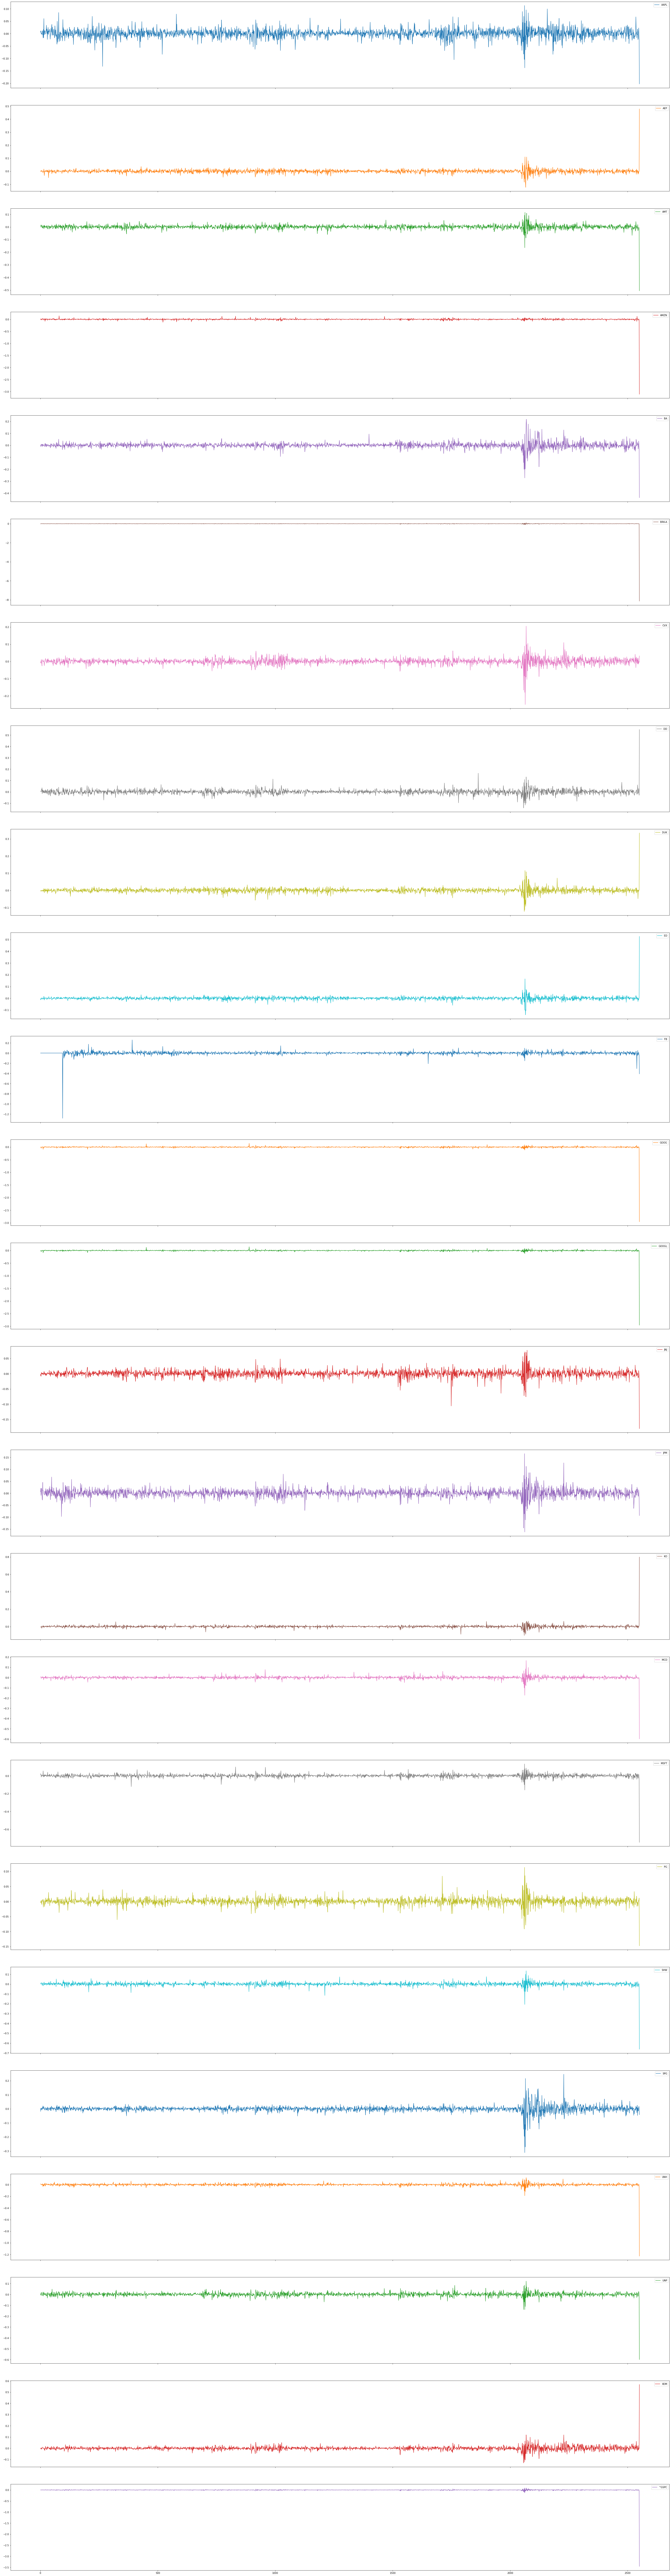

In [16]:
log_returns.plot(kind="line", figsize=(50,200), subplots = True)

In [17]:
daily_percentage_change = data2.pct_change()
daily_percentage_change

AAPL       AEP       AMT      AMZN        BA     BRK-A       CVX  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1     0.005374  0.003188  0.014453 -0.008490  0.001482 -0.009543 -0.001721   
2     0.011102  0.001223  0.011565  0.000563 -0.010763  0.003819 -0.009802   
3     0.010454 -0.003908 -0.001657  0.028152  0.006120 -0.009944 -0.007241   
4    -0.001586  0.004658  0.002822 -0.022178  0.007434  0.000000  0.010895   
...        ...       ...       ...       ...       ...       ...       ...   
2546  0.001423 -0.016771 -0.011017  0.012222 -0.010645 -0.014519 -0.015417   
2547  0.023152 -0.008587 -0.003841  0.008658  0.036612  0.003323 -0.007320   
2548 -0.001389 -0.000351 -0.004542  0.010159  0.005511  0.000979  0.000298   
2549 -0.021269  0.000937 -0.015753 -0.021809 -0.024437 -0.007986 -0.005138   
2550 -0.183148  0.613639 -0.396729 -0.955400 -0.354106 -0.999707  0.032483   

            DD       DUK        ED  ...        KO       MCD      MSFT  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1     0.005371 -0.004626 -0.012366  ... -0.006273  0.005565  0.023534   
2     0.006344 -0.000465 -0.002671  ... -0.004735  0.004427  0.010219   
3     0.005972  0.000000 -0.010713  ... -0.006343  0.007713  0.015535   
4    -0.000330 -0.001859  0.002876  ...  0.000000 -0.009543 -0.013163   
...        ...       ...       ...  ...       ...       ...       ...   
2546  0.000505  0.002005 -0.014716  ...  0.006469 -0.006937 -0.000136   
2547  0.029627 -0.006503 -0.010580  ...  0.003790  0.001658  0.018542   
2548  0.005510  0.002115 -0.003441  ... -0.000164 -0.002837 -0.001167   
2549 -0.029104  0.002081  0.004563  ...  0.020033 -0.008535 -0.029282   
2550  0.730214  0.397245  0.693677  ...  1.220702 -0.450245 -0.525505   

            PG       SHW       SPG       UNH       UNP       XOM     ^GSPC  
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    -0.000449  0.010220 -0.017313  0.014566  0.007222  0.000233  0.000188  
2    -0.004192  0.007724  0.005270  0.006699 -0.007262 -0.003023  0.002944  
3    -0.002405 -0.001511 -0.007746  0.003613 -0.004259 -0.007463 -0.002537  
4     0.004219  0.007784 -0.000789 -0.001137  0.018227  0.004464  0.002262  
...        ...       ...       ...       ...       ...       ...       ...  
2546  0.002879 -0.009594 -0.013608 -0.007801  0.015661 -0.015335 -0.003841  
2547  0.000510  0.004030  0.010150  0.008073  0.027912 -0.012535  0.015767  
2548  0.007588  0.003903  0.017973  0.003806  0.018009  0.004616  0.000881  
2549  0.011455 -0.019844 -0.001321 -0.020227 -0.011111 -0.001532 -0.021173  
2550 -0.136842 -0.483759 -0.039813 -0.706702 -0.450377  0.763390 -0.968506  

[2551 rows x 25 columns]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

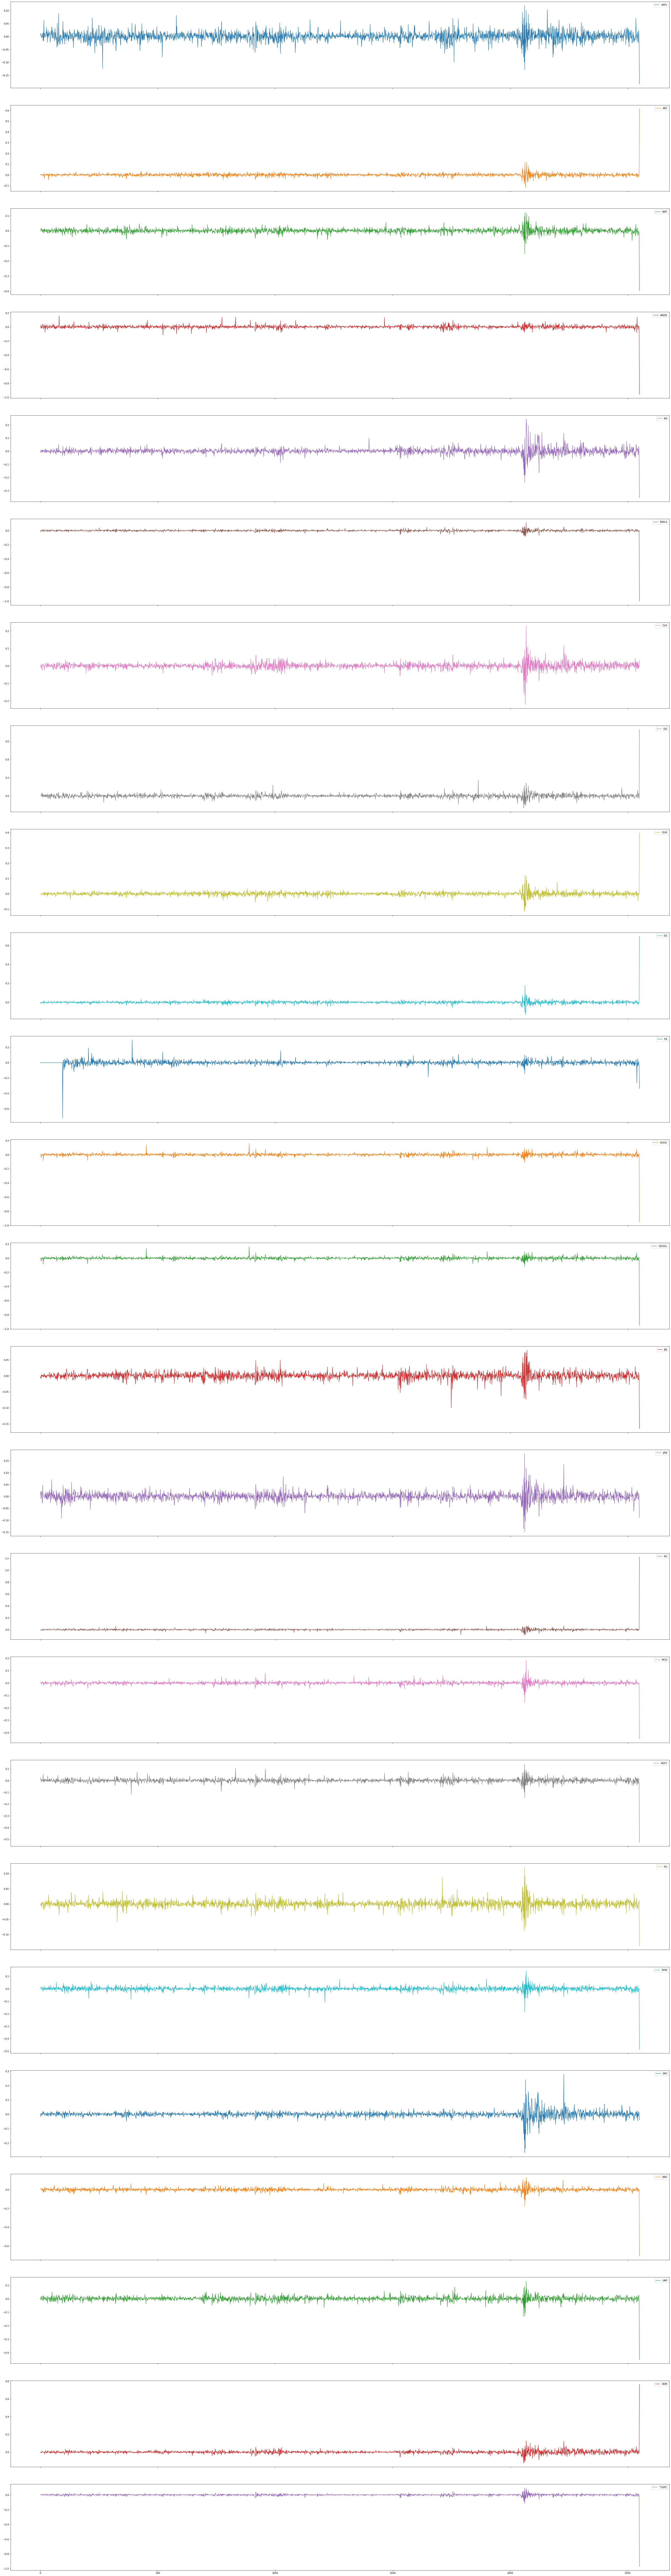

In [18]:
daily_percentage_change.plot(kind="line", figsize=(50,200), subplots = True)

In [19]:
cov = log_returns.cov()

In [20]:
var = log_returns['^GSPC'].var()
var

0.004798143716540104

In [21]:
#beta value of apple stock. If general market goes up 10%, apple is expected to go up by 11.4% 
cov.loc['AAPL', '^GSPC']/var

0.08319321969402865

In [22]:
#beta value of all. SP500 is beta=1
beta_values = cov.loc['^GSPC']/var
beta_values

AAPL     0.083193
AEP     -0.123486
AMT      0.160968
AMZN     0.902328
BA       0.155139
BRK-A    2.318270
CVX      0.016381
DD      -0.128337
DUK     -0.081517
ED      -0.138724
FB       0.141127
GOOG     0.859154
GOOGL    0.859718
JNJ      0.065525
JPM      0.053620
KO      -0.210706
MCD      0.185837
MSFT     0.237235
PG       0.055139
SHW      0.208099
SPG      0.036419
UNH      0.368869
UNP      0.192850
XOM     -0.138348
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [23]:
#cross-checking beta value of apple using linear regression
X = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1,1)
Y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1,1)

lin_regr = LinearRegression()
lin_regr.fit(X,Y)

lin_regr.coef_[0,0]

#got same value by different method. That proves other Beta values were true

0.08319321969402864

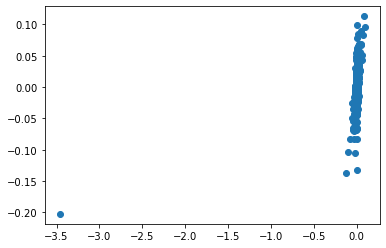

In [24]:
fig, ax = plt.subplots()
ax.scatter(X,Y)

In [25]:
#Measure of dispersion
#Historical vs. implied volatility
standard_deviation_stocks = dict(data2.std())
standard_deviation_stocks

{'AAPL': 41.51965780667847,
 'AEP': 19.541793935533143,
 'AMT': 70.28921894874655,
 'AMZN': 1067.18331803364,
 'BA': 98.77743416843707,
 'BRK-A': 85582.39334593964,
 'CVX': 14.015710360094063,
 'DD': 17.441243689951015,
 'DUK': 16.906383498154803,
 'ED': 14.534996362260658,
 'FB': 88.29303855653363,
 'GOOG': 655.9043830920644,
 'GOOGL': 647.0719805283932,
 'JNJ': 33.60051606497492,
 'JPM': 37.857268990115955,
 'KO': 8.856141445232925,
 'MCD': 57.26188357607878,
 'MSFT': 82.4835389394426,
 'PG': 29.03966702189892,
 'SHW': 75.38536499244412,
 'SPG': 26.566155966559723,
 'UNH': 116.05601252893075,
 'UNP': 54.75683269772108,
 'XOM': 8.785783130594863,
 '^GSPC': 854.29647170567}

In [26]:
sorted_acc_to_std = dict(sorted(standard_deviation_stocks.items(), key=lambda x: x[1]))

sorted_acc_to_std

{'XOM': 8.785783130594863,
 'KO': 8.856141445232925,
 'CVX': 14.015710360094063,
 'ED': 14.534996362260658,
 'DUK': 16.906383498154803,
 'DD': 17.441243689951015,
 'AEP': 19.541793935533143,
 'SPG': 26.566155966559723,
 'PG': 29.03966702189892,
 'JNJ': 33.60051606497492,
 'JPM': 37.857268990115955,
 'AAPL': 41.51965780667847,
 'UNP': 54.75683269772108,
 'MCD': 57.26188357607878,
 'AMT': 70.28921894874655,
 'SHW': 75.38536499244412,
 'MSFT': 82.4835389394426,
 'FB': 88.29303855653363,
 'BA': 98.77743416843707,
 'UNH': 116.05601252893075,
 'GOOGL': 647.0719805283932,
 'GOOG': 655.9043830920644,
 '^GSPC': 854.29647170567,
 'AMZN': 1067.18331803364,
 'BRK-A': 85582.39334593964}

In [27]:
sorted_list_std = list(sorted_acc_to_std.keys())
sorted_acc_to_std = list(sorted_acc_to_std)
sorted_list_std_low = sorted_acc_to_std[0:9]
sorted_acc_to_std_medium = sorted_acc_to_std[10:17]
sorted_acc_to_std_high = sorted_acc_to_std[18:26]

In [29]:
risk_level = int(input("What risk level would you prefer for your investment?  \n 1 = low,\n 2 = medium,\n 3 = high: \n \n"))

What risk level would you prefer for your investment?  
 1 = low,
 2 = medium,
 3 = high: 
 
1


In [30]:
def stocks_for_correlation(risk_level):
    if risk_level == 1:
        print("Best low risk stocks are:", sorted_list_std_low)
        return sorted_list_std_low
    elif risk_level == 2:
        print("Best medium risk stocks are:", sorted_acc_to_std_medium)
        return sorted_acc_to_std_medium
    elif risk_level == 3:
       print("Best high risk stocks are:", sorted_acc_to_std_high)
       return sorted_acc_to_std_high
    else:
        print("invalid input. please enter 0,1,2")

In [31]:
stocks_for_correlation(risk_level)

Best low risk stocks are: ['XOM', 'KO', 'CVX', 'ED', 'DUK', 'DD', 'AEP', 'SPG', 'PG']


['XOM', 'KO', 'CVX', 'ED', 'DUK', 'DD', 'AEP', 'SPG', 'PG']

In [32]:
diversification = data[stocks_for_correlation(risk_level)]

Best low risk stocks are: ['XOM', 'KO', 'CVX', 'ED', 'DUK', 'DD', 'AEP', 'SPG', 'PG']


In [33]:
diversification

XOM          KO         CVX          ED         DUK          DD  \
0      56.468872   25.638760   72.389839   40.717735   41.743435   31.980608   
1      56.482021   25.477926   72.265221   40.214218   41.550350   32.152367   
2      56.311291   25.357292   71.556862   40.106796   41.531040   32.356335   
3      55.891052   25.196459   71.038734   39.677135   41.531040   32.549572   
4      56.140549   25.196459   71.812683   39.791260   41.453823   32.538837   
...          ...         ...         ...         ...         ...         ...   
2546   78.980003   60.680000  135.250000   82.229996   98.960640   79.320000   
2547   77.989998   60.910000  134.259995   81.360001   98.317085   81.669998   
2548   78.349998   60.900002  134.300003   81.080002   98.525002   82.120003   
2549   78.230003   62.119999  133.610001   81.449997   98.730003   79.730003   
2550  137.949997  137.949997  137.949997  137.949997  137.949997  137.949997   

             AEP         SPG          PG  
0      27.925907   81.046120   49.150513  
1      28.014942   79.642937   49.128445  
2      28.049196   80.062622   48.922508  
3      27.939592   79.442474   48.804848  
4      28.069735   79.379822   49.010765  
...          ...         ...         ...  
2546   86.180000  139.899994  156.740005  
2547   85.440002  141.320007  156.820007  
2548   85.410004  143.860001  158.009995  
2549   85.489998  143.669998  159.820007  
2550  137.949997  137.949997  137.949997  

[2551 rows x 9 columns]

In [34]:
diversification.corr()

XOM        KO       CVX        ED       DUK        DD       AEP  \
XOM  1.000000 -0.214395  0.386883 -0.193073 -0.241810  0.307211 -0.298929   
KO  -0.214395  1.000000  0.658181  0.897005  0.968413  0.529926  0.955372   
CVX  0.386883  0.658181  1.000000  0.634187  0.642752  0.634521  0.618364   
ED  -0.193073  0.897005  0.634187  1.000000  0.907322  0.641700  0.956659   
DUK -0.241810  0.968413  0.642752  0.907322  1.000000  0.575125  0.965804   
DD   0.307211  0.529926  0.634521  0.641700  0.575125  1.000000  0.555140   
AEP -0.298929  0.955372  0.618364  0.956659  0.965804  0.555140  1.000000   
SPG  0.697088  0.158849  0.392636  0.253497  0.175452  0.557016  0.139318   
PG  -0.394551  0.934705  0.549518  0.800203  0.944447  0.376427  0.912464   

          SPG        PG  
XOM  0.697088 -0.394551  
KO   0.158849  0.934705  
CVX  0.392636  0.549518  
ED   0.253497  0.800203  
DUK  0.175452  0.944447  
DD   0.557016  0.376427  
AEP  0.139318  0.912464  
SPG  1.000000 -0.043951  
PG  -0.043951  1.000000

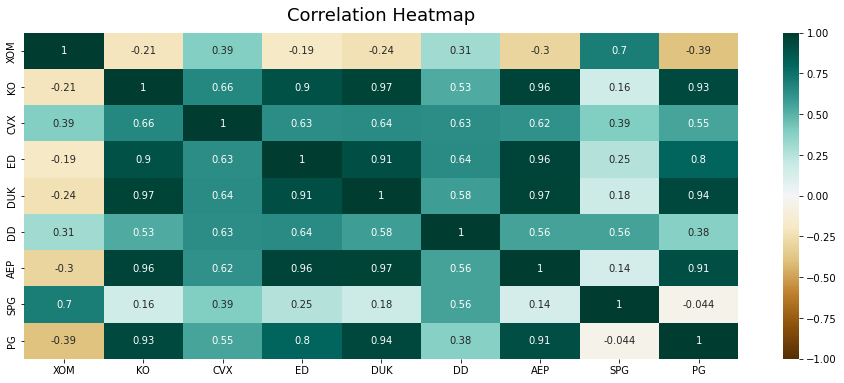

In [35]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(diversification.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [36]:
c = diversification.corr()
s = c.unstack()
sort_by_corr = s.sort_values(kind="quicksort")
sort_by_corr

PG   XOM   -0.394551
XOM  PG    -0.394551
AEP  XOM   -0.298929
XOM  AEP   -0.298929
DUK  XOM   -0.241810
              ...   
ED   ED     1.000000
CVX  CVX    1.000000
KO   KO     1.000000
SPG  SPG    1.000000
PG   PG     1.000000
Length: 81, dtype: float64

In [37]:
dict_sorted_corr = dict(sort_by_corr)
dict_sorted_corr

{('PG', 'XOM'): -0.3945512649534001,
 ('XOM', 'PG'): -0.3945512649534001,
 ('AEP', 'XOM'): -0.29892878756321684,
 ('XOM', 'AEP'): -0.29892878756321684,
 ('DUK', 'XOM'): -0.2418103988560895,
 ('XOM', 'DUK'): -0.2418103988560895,
 ('KO', 'XOM'): -0.21439465857627718,
 ('XOM', 'KO'): -0.21439465857627718,
 ('XOM', 'ED'): -0.19307271187018038,
 ('ED', 'XOM'): -0.19307271187018038,
 ('PG', 'SPG'): -0.043951003532125485,
 ('SPG', 'PG'): -0.043951003532125485,
 ('SPG', 'AEP'): 0.13931785890684284,
 ('AEP', 'SPG'): 0.13931785890684284,
 ('SPG', 'KO'): 0.15884935547934154,
 ('KO', 'SPG'): 0.15884935547934154,
 ('DUK', 'SPG'): 0.17545232958315224,
 ('SPG', 'DUK'): 0.17545232958315224,
 ('SPG', 'ED'): 0.2534965029741114,
 ('ED', 'SPG'): 0.2534965029741114,
 ('XOM', 'DD'): 0.30721059519701477,
 ('DD', 'XOM'): 0.30721059519701477,
 ('PG', 'DD'): 0.3764270800761797,
 ('DD', 'PG'): 0.3764270800761797,
 ('XOM', 'CVX'): 0.3868825459608537,
 ('CVX', 'XOM'): 0.3868825459608537,
 ('CVX', 'SPG'): 0.3926364

In [38]:
non_corr_stocks = list(dict_sorted_corr.keys())[0:3]
non_corr_stocks

[('PG', 'XOM'), ('XOM', 'PG'), ('AEP', 'XOM')]

In [39]:
#list of tuples to plain list
o = [item for t in non_corr_stocks for item in t]
o

['PG', 'XOM', 'XOM', 'PG', 'AEP', 'XOM']

In [40]:
#creating set to get 3 distinct keys
tuple_non_corr_stocks = set(o)
tuple_non_corr_stocks

{'AEP', 'PG', 'XOM'}

In [41]:
stocks_to_invest = list(tuple_non_corr_stocks)
stocks_to_invest

['PG', 'AEP', 'XOM']

In [42]:
data['^GSPC']

0       1277.060059
1       1277.300049
2       1281.060059
3       1277.810059
4       1280.699951
           ...     
2546    4401.669922
2547    4471.069824
2548    4475.009766
2549    4380.259766
2550     137.949997
Name: ^GSPC, Length: 2551, dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
scaled_df = scaler.fit_transform(np.array(data['^GSPC']).reshape(-1, 1))

In [45]:
print(scaled_df)

[[0.24451715]
 [0.24456867]
 [0.24537578]
 ...
 [0.9309772 ]
 [0.91063852]
 [0.        ]]


In [46]:
# Train-Test splitting
# For linear regression or classification problem we can use Cross validation and random seed
# But for Time series data we need to devide in different way.
# Because next data always dependent to previous data.

In [47]:
# splitting data into training and testing 
# 80% for model training and 20% for model testing

training_data = pd.DataFrame(scaled_df [0 : int(len(data)*0.80)])
testing_data = pd.DataFrame(scaled_df [int(len(data)*0.80) : int(len(data))])

In [48]:
training_data.shape, testing_data.shape

((2040, 1), (511, 1))

In [49]:
np.array(training_data)

array([[0.24451715],
       [0.24456867],
       [0.24537578],
       ...,
       [0.68470207],
       [0.68993542],
       [0.69115036]])

In [50]:
def createDataSet(data, time_stamp):
    data = np.array(data)
    x_train = []
    y_train = []
    for i in range(len(data) - time_stamp -1):
        lst = data[i : (i + time_stamp), 0]
        x_train.append(lst)
        y_train.append(data[i + time_stamp, 0])
    return np.array(x_train), np.array(y_train)

In [51]:
time_stamp = 100
x_train, y_train = createDataSet(training_data, time_stamp)
x_test, y_test = createDataSet(testing_data, time_stamp)

In [52]:
print(x_train)

[[0.24451715 0.24456867 0.24537578 ... 0.25301109 0.25348977 0.25388046]
 [0.24456867 0.24537578 0.24467814 ... 0.25348977 0.25388046 0.25326652]
 [0.24537578 0.24467814 0.24529848 ... 0.25388046 0.25326652 0.25640052]
 ...
 [0.61594335 0.61391916 0.6155806  ... 0.66778929 0.67823665 0.68620037]
 [0.61391916 0.6155806  0.6158017  ... 0.67823665 0.68620037 0.68858093]
 [0.6155806  0.6158017  0.61581459 ... 0.68620037 0.68858093 0.68470207]]


In [53]:
print(x_train[0].shape)

(100,)


In [54]:
x_train.shape, y_train.shape

((1939, 100), (1939,))

In [55]:
# We need to reshape input in 3rd [samples, time stemps, features] which is important for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [56]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [57]:
x_train.shape[1]

100

In [58]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2)) # randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting

model.add(LSTM(units = 100, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 150, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          60400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 150)          150600    
                                                                 
 dropout_2 (Dropout)         (None, 100, 150)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               1

In [60]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])
model.fit(x_train, y_train, validation_data = (x_test, y_test), 
          epochs = 100, shuffle = True, verbose = 1, batch_size = 64)

Epoch 1/100
31/31 [==============================] - 17s 481ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0817 - val_mse: 0.0817
Epoch 2/100
31/31 [==============================] - 16s 505ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3/100
31/31 [==============================] - 16s 507ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/100
31/31 [==============================] - 16s 510ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 5/100
31/31 [==============================] - 15s 499ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 6/100
31/31 [==============================] - 16s 512ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/100
31/31 [==============================] - 16s 518ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 8/100
31/31 [==============================] - 17s 534ms

31/31 [==============================] - 15s 495ms/step - loss: 9.5758e-04 - mse: 9.5758e-04 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 62/100
31/31 [==============================] - 15s 489ms/step - loss: 8.4688e-04 - mse: 8.4688e-04 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 63/100
31/31 [==============================] - 15s 484ms/step - loss: 8.5928e-04 - mse: 8.5928e-04 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 64/100
31/31 [==============================] - 15s 484ms/step - loss: 8.8345e-04 - mse: 8.8345e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 65/100
31/31 [==============================] - 15s 468ms/step - loss: 8.1824e-04 - mse: 8.1824e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 66/100
31/31 [==============================] - 15s 484ms/step - loss: 8.1533e-04 - mse: 8.1533e-04 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 67/100
31/31 [==============================] - 15s 494ms/step - loss: 7.8091e-04 - mse: 7.8091e-04 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 68/100

In [62]:
model.save('financial_ad_model.h5')

In [63]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [141]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, train_predict)

0.000514256586768336

In [67]:
mean_squared_error(y_test, test_predict)

0.002295024086013818

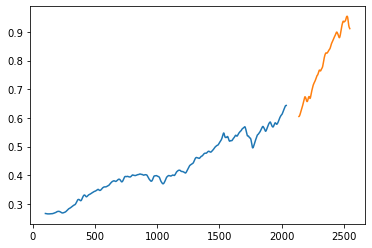

In [76]:
import numpy
# comparing train and test result with original data by plotting all in single graph
### Plotting 
trainPredictPlot = numpy.empty_like(scaled_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stamp:len(train_predict)+time_stamp, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(scaled_df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(time_stamp*2)+1:len(scaled_df)-1, :] = test_predict

# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(scaled_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Orange line = Train Predicted data
# Blue line = Main Data
# Green line = Test Predicated data